In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ### for plotting the data on india map


In [ ]:
path = 'https://raw.githubusercontent.com/itsnivas-k/covid19india/main/Book%204.csv'
df = pd.read_csv(path)
df.head(36)

,#,State/UT,Confirmed Cases,Active Cases,Cured,Death
0,1,Andaman and Nicobar Islands,10034,0,9905,129
1,2,Andhra Pradesh,2319653,35,2304888,14730
2,3,Arunachal Pradesh,64495,0,64199,296
3,4,Assam,724204,1353,716212,6639
4,5,Bihar,830514,16,818242,12256
5,6,Chandigarh,91976,22,90789,1165
6,7,Chhattisgarh,1152228,11,1138183,14034
7,8,Dadra and Nagar Haveli and Daman and Diu,11441,0,11437,4
8,9,Delhi,1871657,2970,1842525,26162
9,10,Goa,245376,24,241520,3832


In [ ]:
india = df.groupby("State/UT")['Confirmed Cases','Active Cases','Cured','Death'].sum().reset_index()
india.head(36)
top_20 = india.sort_values(by=['Confirmed Cases'], ascending=False).head(20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


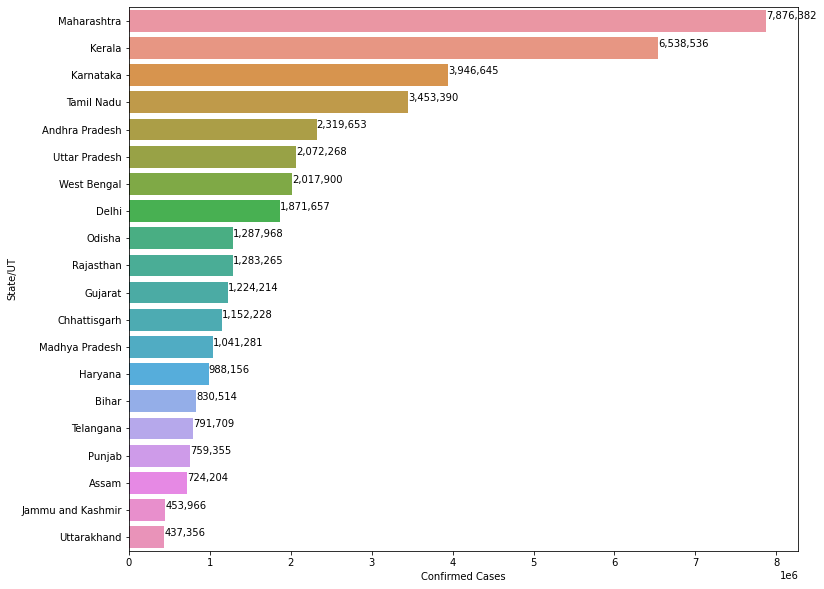

In [ ]:
### Generate a Barplot
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Confirmed Cases'], top_20['State/UT'])
for i,(value,name) in enumerate(zip(top_20['Confirmed Cases'],top_20['State/UT'])):
  plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

top_5 = india.sort_values(by=['Confirmed Cases'], ascending=False).head()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


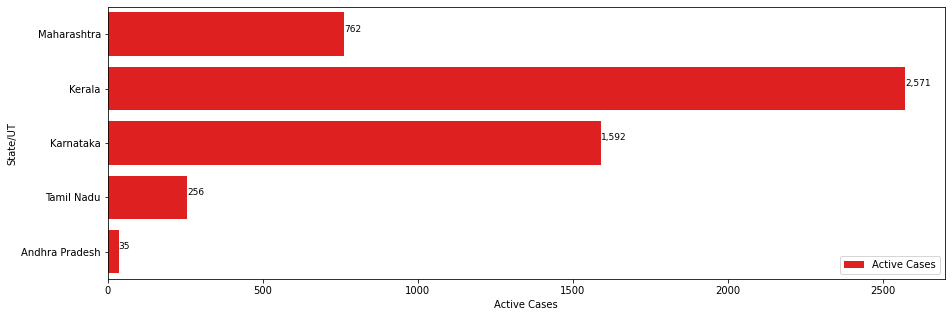

In [ ]:

   ### Generate a Barplot
plt.figure(figsize=(15,5))
active  = sns.barplot(top_5['Active Cases'], top_5['State/UT'], color = 'red', label='Active Cases')

### Adding Texts for barplots
for i,(value,name) in enumerate(zip(top_5['Active Cases'],top_5['State/UT'])):
   active.text(value,i-0.05,f'{value:,.0f}',size=9)

plt.legend(loc=4)
plt.show()

In [7]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("https://raw.githubusercontent.com/itsnivas-k/active-cases/main/active%20cases2022.csv")

fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=df['state'],
    z=df['active cases'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Active Cases"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0,
        dtick=500,
        xanchor='left',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)
fig.update_layout(
    title=dict(
        text="Active COVID-19 Cases in India by State as of April 22, 2022",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()